In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('output_combined.csv', index_col='id')

In [4]:
df.describe()

,retweets,favorites,replies
count,19229.000000,19229.000000,19229.000000
mean,0.573353,1.851058,0.084976
std,3.913857,13.919935,0.706045
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000
max,212.000000,1043.000000,51.000000


In [5]:
def norm_log(col):
    log_max = np.log(df[col].max() + 1)
    return df[col].map(lambda x: np.log(x + 1)/log_max)
    
def norm_inv(col):
    return df[col].map(lambda x: 1 - 1/(x + 1))

def norm_comb(col):
    return 0.5 * norm_log(col) + 0.5 * norm_inv(col)

norm_log('retweets').hist(bins=50);
norm_inv('retweets').hist(bins=50);
norm_comb('retweets').hist(bins=50);

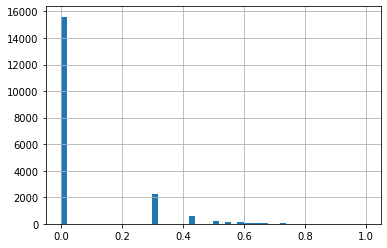

In [9]:
norm_comb('retweets').hist(bins=50);

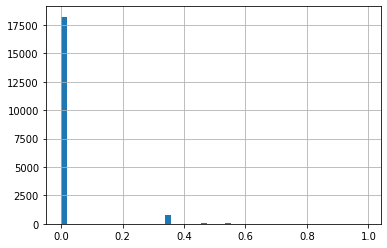

In [6]:
norm_comb('replies').hist(bins=50);

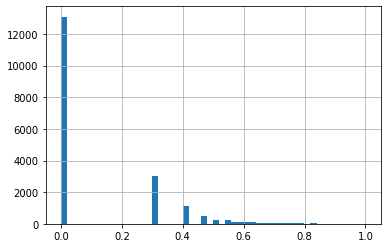

In [7]:
norm_comb('favorites').hist(bins=50);

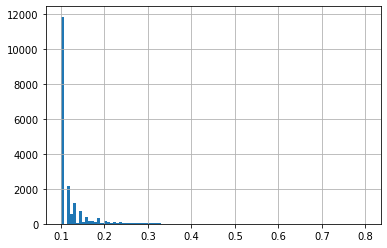

In [8]:
def overall_norm(func):
    return 0.1 + 0.15 * func('favorites') + 0.25 * func('retweets') + 0.5 * func('replies')

overall_norm(norm_log).hist(bins=100)

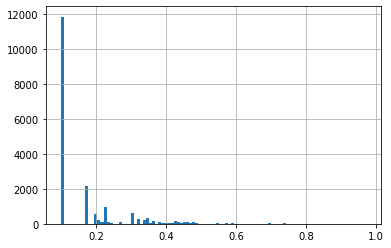

In [10]:
overall_norm(norm_inv).hist(bins=100)

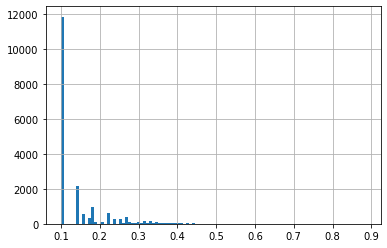

In [11]:
overall_norm(norm_comb).hist(bins=100)

In [18]:
overall_norm(norm_log).nlargest(10)

id
1200142436401647616    0.799569
1196194181653368832    0.785081
1199295375812640770    0.755385
1200078595886112769    0.754537
1192660456277544960    0.745179
1198747521570476034    0.741894
1199954783999840256    0.737395
1194986020963520518    0.729649
1198978950157914113    0.718850
1200129785638408198    0.695463
dtype: float64

In [19]:
overall_norm(norm_log).to_csv('engagement_output.csv', header=['score'])